# Project 2 - Ames Housing Data and Kaggle Challenge - Notebook 1

[DSI-US-8 Regression Challenge on Kaggle](https://www.kaggle.com/c/dsi-us-8-project-2-regression-challenge)<br>
[Data Description](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)

---

## Contents
- [Import Libraries](#Import-Libraries)
- [Load Data](#Load-Data)
- [Exploratory Data Analysis and Exploratory Visualizations](#Exploratory-Data-Analysis-and-Exploratory-Visualizations)
- [Data Cleaning](#Data-Cleaning)
- [Pre-Processing](#Pre\-Processing)
- [Save Results](#Save-Results)
- [Repeat Loading Data, Data Cleaning, Pre-Processing, and Saving Results for Test Dataset](#Repeat-Loading-Data,-Data-Cleaning,-Pre\-Processing,-and-Saving-Results-for-Test-Dataset)

## Import Libraries

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from matplotlib.ticker import FormatStrFormatter, FuncFormatter

from joblib import dump, load

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

## Load Data

In [31]:
df = pd.read_csv("../datasets/train.csv", dtype = {"Id":str, "PID":str, "MS SubClass":str})
# df.rename(columns = {"__": "__"}, inplace = True)
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


## Exploratory Data Analysis and Exploratory Visualizations

In [32]:
df.isnull().sum()

Id                    0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        330
Lot Area              0
Street                0
Alley              1911
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         22
Mas Vnr Area         22
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            55
Bsmt Cond            55
Bsmt Exposure        58
BsmtFin Type 1       55
BsmtFin SF 1          1
BsmtFin Type 2       56
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC      

In [33]:
df.dtypes

Id                  object
PID                 object
MS SubClass         object
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
B

In [34]:
df.describe()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.441094,0.764537,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   object 
 1   PID              2051 non-null   object 
 2   MS SubClass      2051 non-null   object 
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

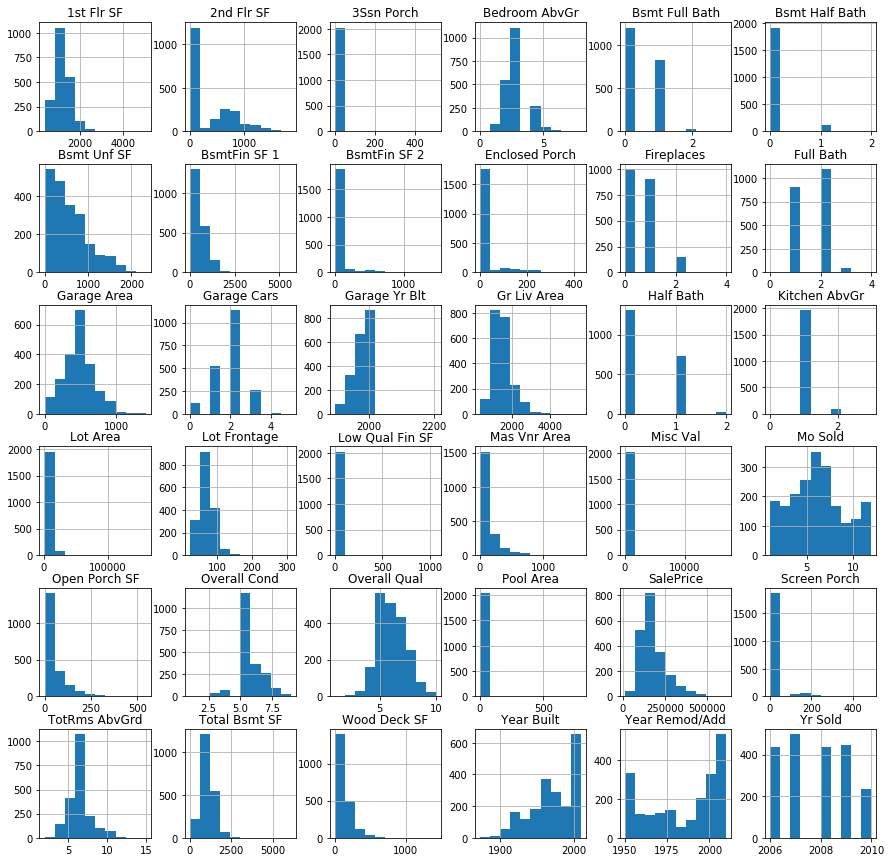

In [36]:
df.hist(figsize = (15, 15));

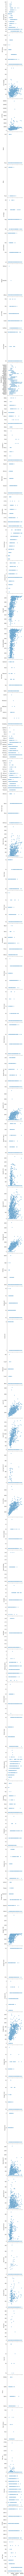

In [37]:
y_to_plot = [i for i in df.columns.tolist() if (i != "Id" and i != "PID" and i != "SalePrice")]
df_to_plot = df.drop(columns = ["Id","PID"])
sns.pairplot(df_to_plot, y_vars = y_to_plot, x_vars = ["SalePrice"], height = 5, aspect = .6);

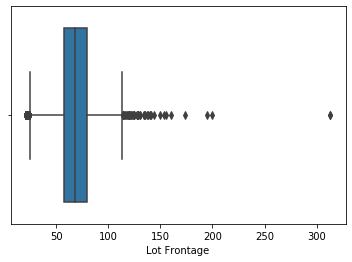

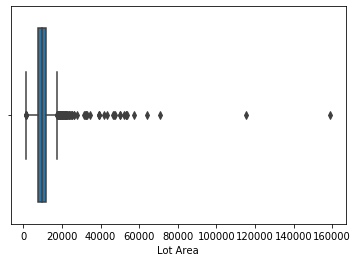

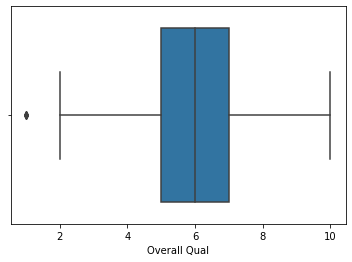

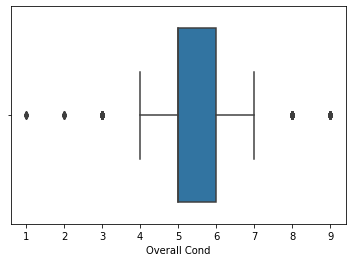

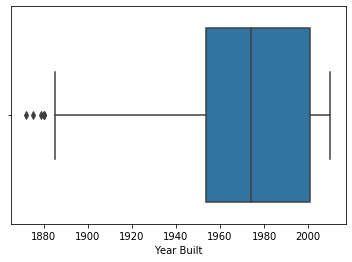

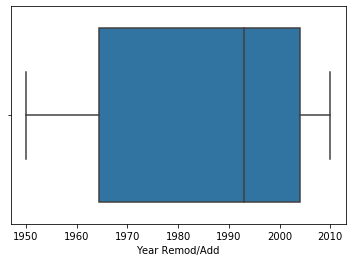

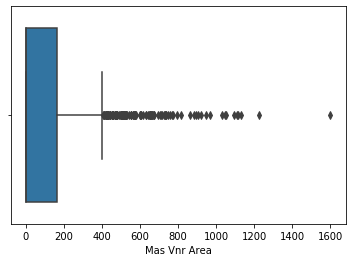

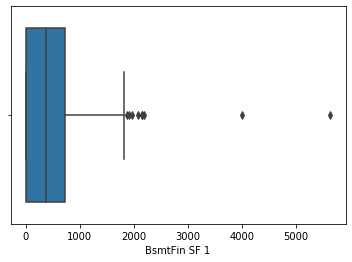

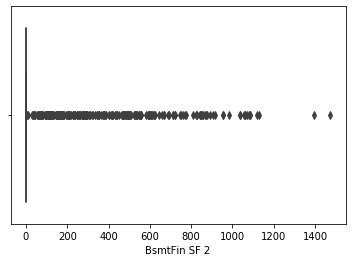

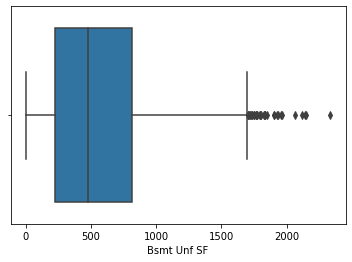

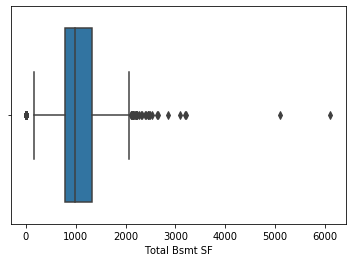

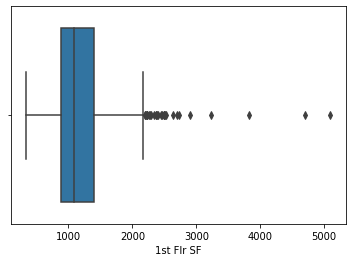

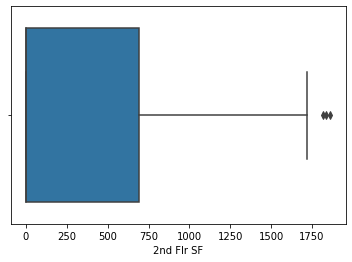

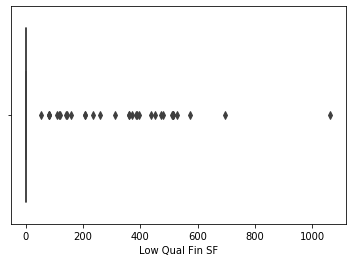

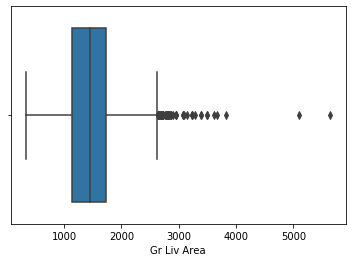

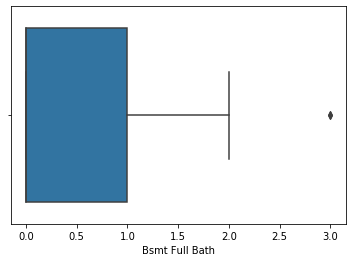

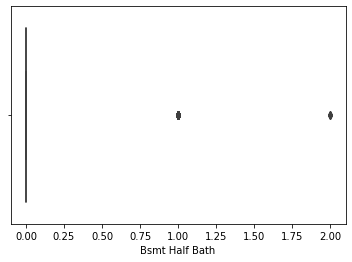

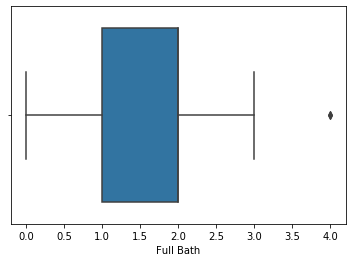

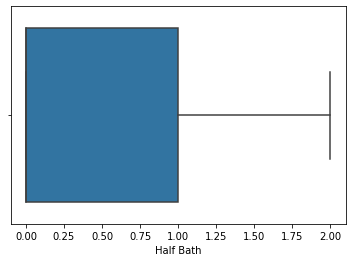

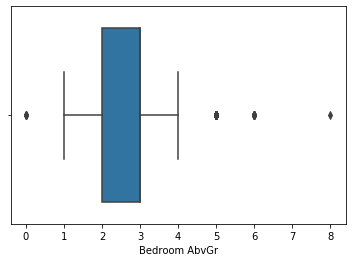

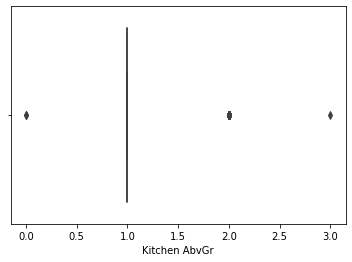

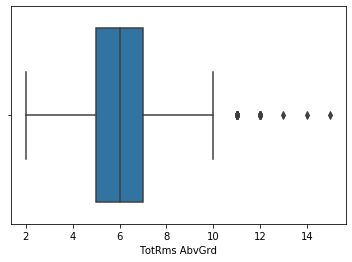

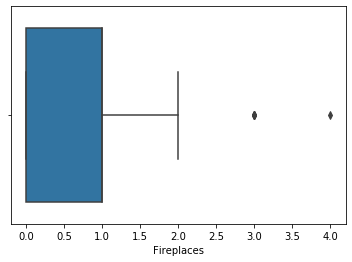

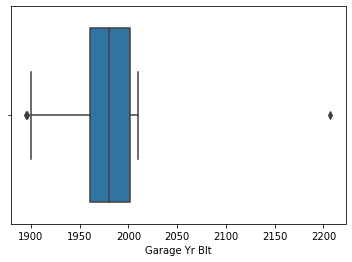

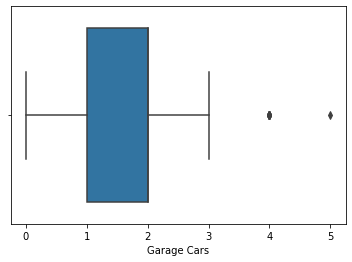

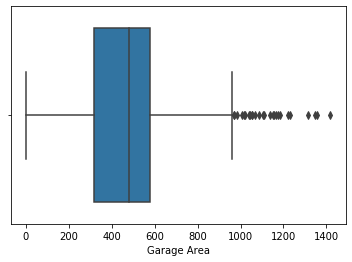

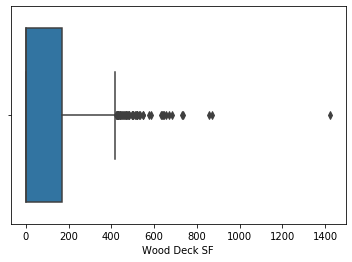

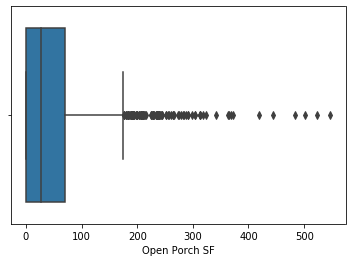

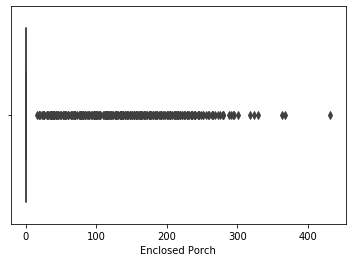

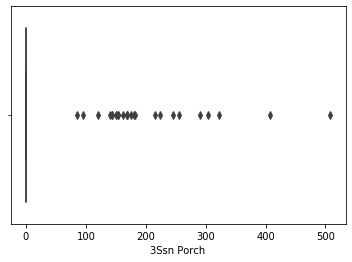

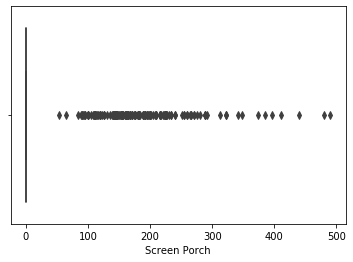

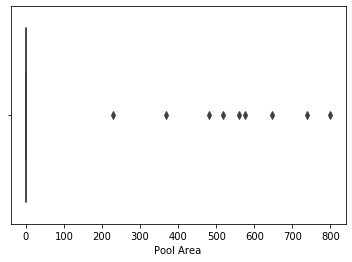

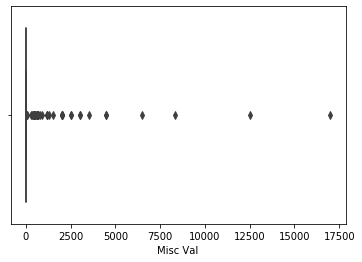

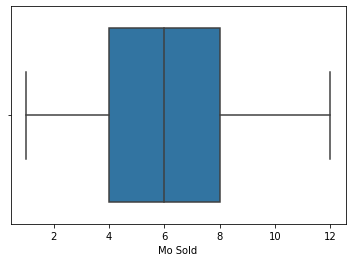

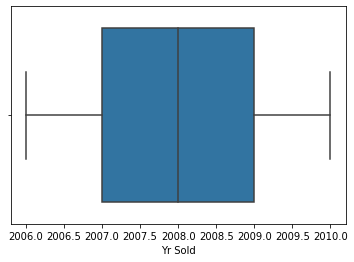

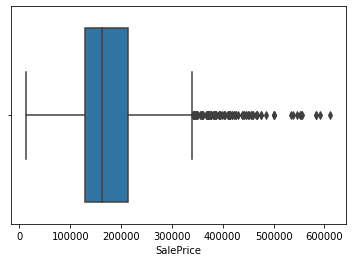

In [38]:
def boxplot_all_numerical_vars(df):
    for i in range(0,len(df.columns)):
        if df.iloc[:,i].dtypes == "float64" or df.iloc[:,i].dtypes == "int64":
            sns.boxplot(df.iloc[:,i])
            plt.show()   
boxplot_all_numerical_vars(df)

In [39]:
df.corr()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Lot Frontage,1.000000,0.574024,0.194808,-0.054455,0.109504,0.085052,0.218218,0.214178,0.036740,0.127605,0.356584,0.463900,0.013700,-0.000300,0.383856,0.111441,-0.030858,0.152812,0.035842,0.220414,0.015856,0.362704,0.253456,0.067865,0.297143,0.358457,0.115180,0.184958,-0.003302,0.031855,0.074819,0.156575,0.051676,-0.017389,0.009112,0.341842
Lot Area,0.574024,1.000000,0.105824,-0.019185,0.036002,0.050771,0.169379,0.215430,0.041717,0.041184,0.277175,0.381593,0.029398,0.001273,0.327427,0.116128,0.029980,0.125601,0.049995,0.139060,-0.013484,0.238724,0.289467,0.004882,0.214954,0.263296,0.155623,0.140864,0.014139,0.019553,0.067714,0.115102,0.093922,0.003197,-0.029454,0.296566
Overall Qual,0.194808,0.105824,1.000000,-0.082770,0.602964,0.584654,0.438685,0.278742,-0.028199,0.275773,0.548742,0.477136,0.228152,-0.052338,0.566701,0.175171,-0.047318,0.515080,0.274859,0.053373,-0.170964,0.382025,0.388920,0.574553,0.587423,0.563814,0.257081,0.308855,-0.154554,0.031938,0.048752,0.006558,0.022099,0.019242,-0.011578,0.800207
Overall Cond,-0.054455,-0.019185,-0.082770,1.000000,-0.370988,0.042614,-0.135878,-0.045768,0.047810,-0.130521,-0.158643,-0.150938,0.010912,0.004753,-0.109804,-0.039113,0.100324,-0.219189,-0.093266,-0.009908,-0.095725,-0.093576,-0.006463,-0.331765,-0.168513,-0.137917,0.011034,-0.052266,0.108320,0.026907,0.047359,-0.005806,0.014269,-0.003144,0.047664,-0.097019
Year Built,0.109504,0.036002,0.602964,-0.370988,1.000000,0.629116,0.329741,0.275440,-0.021031,0.136662,0.410254,0.323315,0.022313,-0.159403,0.258838,0.215200,-0.031464,0.480169,0.283207,-0.042149,-0.127162,0.137783,0.168848,0.825316,0.542544,0.487177,0.216339,0.207798,-0.380082,0.016104,-0.037866,0.003728,0.000626,-0.007083,-0.003559,0.571849
Year Remod/Add,0.085052,0.050771,0.584654,0.042614,0.629116,1.000000,0.211443,0.166680,-0.057163,0.160066,0.308545,0.244190,0.159605,-0.066577,0.322407,0.153507,-0.037923,0.471555,0.224106,-0.019748,-0.135926,0.202397,0.138858,0.674024,0.441796,0.398999,0.216271,0.264476,-0.237523,0.040416,-0.041211,-0.022382,-0.001704,0.011568,0.042744,0.550370
Mas Vnr Area,0.218218,0.169379,0.438685,-0.135878,0.329741,0.211443,1.000000,0.321807,-0.016756,0.085853,0.408575,0.391349,0.100568,-0.061878,0.387833,0.148049,0.010220,0.240034,0.192687,0.054589,-0.070677,0.273359,0.269104,0.266763,0.361211,0.384718,0.163584,0.163489,-0.107104,0.011161,0.086631,0.012422,0.079219,-0.001472,-0.018719,0.512230
BsmtFin SF 1,0.214178,0.215430,0.278742,-0.045768,0.275440,0.166680,0.321807,1.000000,-0.050249,-0.473488,0.538999,0.462198,-0.168015,-0.078362,0.215295,0.645432,0.077500,0.074982,-0.006742,-0.120760,-0.096397,0.055973,0.298506,0.188605,0.260676,0.331611,0.214274,0.140286,-0.076963,0.047719,0.093226,0.075925,0.130042,-0.010534,0.037978,0.423519
BsmtFin SF 2,0.036740,0.041717,-0.028199,0.047810,-0.021031,-0.057163,-0.016756,-0.050249,1.000000,-0.231330,0.086545,0.095675,-0.087505,-0.002764,0.001083,0.157008,0.093908,-0.074144,-0.016473,-0.043294,-0.036415,-0.047434,0.067976,-0.062510,-0.002129,0.013190,0.105836,-0.004382,0.004540,-0.024225,0.096405,0.061026,-0.005515,-0.013945,-0.000013,0.016255
Bsmt Unf SF,0.127605,0.041184,0.275773,-0.130521,0.136662,0.160066,0.085853,-0.473488,-0.231330,1.000000,0.419238,0.302299,-0.012928,0.059575,0.234618,-0.403082,-0.109729,0.278633,-0.042559,0.190827,0.062917,0.256080,0.001821,0.177751,0.167905,0.145080,-0.034438,0.116019,-0.010847,0.020409,-0.055558,-0.039209,-0.005888,0.020043,-0.043683,0.190210


## Data Cleaning

### One house appears to have an unusually new garage:

In [40]:
df[df["Garage Yr Blt"] >= 2100]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1699,2261,916384070,20,RL,68.0,8298,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,Av,GLQ,583.0,Unf,0.0,963.0,1546.0,GasA,Ex,Y,SBrkr,1564,0,0,1564,0.0,0.0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2207.0,RFn,2.0,502.0,TA,TA,Y,132,0,0,0,0,0,NaN,NaN,NaN,0,9,2007,New,267300


**The garage was not built in 2207. One can make an educated guess that 2207 was a typo and assume that the garage was built in 2007, the year of the house's remodel:**


In [41]:
df.loc[1699,"Garage Yr Blt"] = df.loc[1699,"Year Remod/Add"]

### Several houses (Ids 1499 and 2181) appear to be outliers for basement size, first floor size, and above ground living area. See slices of dataframe and plots below for each:

In [42]:
df[df["BsmtFin SF 1"] >= 3000]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
960,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,160000
1885,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,NaN,NaN,Elev,17000,10,2007,New,183850


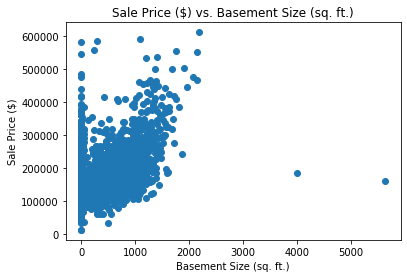

In [43]:
x = df["BsmtFin SF 1"]
y = df["SalePrice"]
plt.title("Sale Price ($) vs. Basement Size (sq. ft.)")
plt.xlabel("Basement Size (sq. ft.)")
plt.ylabel("Sale Price ($)")
plt.scatter(x,y);

In [44]:
df[df["1st Flr SF"] >= 4000]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
960,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,160000
1885,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,NaN,NaN,Elev,17000,10,2007,New,183850


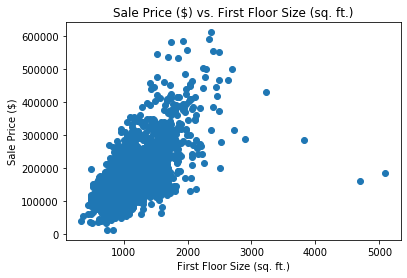

In [45]:
x = df["1st Flr SF"]
y = df["SalePrice"]
plt.title("Sale Price ($) vs. First Floor Size (sq. ft.)")
plt.xlabel("First Floor Size (sq. ft.)")
plt.ylabel("Sale Price ($)")
plt.scatter(x,y);

In [46]:
df[df["Gr Liv Area"] >= 5000]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
960,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,160000
1885,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,NaN,NaN,Elev,17000,10,2007,New,183850


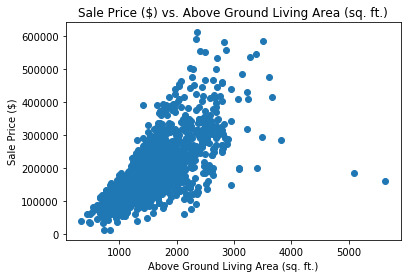

In [47]:
x = df["Gr Liv Area"]
y = df["SalePrice"]
plt.title("Sale Price ($) vs. Above Ground Living Area (sq. ft.)")
plt.xlabel("Above Ground Living Area (sq. ft.)")
plt.ylabel("Sale Price ($)")
plt.scatter(x,y);

In [48]:
print(df.loc[[960,1885],["BsmtFin SF 1","1st Flr SF","Gr Liv Area","SalePrice"]])

df[["BsmtFin SF 1","1st Flr SF","Gr Liv Area","SalePrice"]].describe()

      BsmtFin SF 1  1st Flr SF  Gr Liv Area  SalePrice
960         5644.0        4692         5642     160000
1885        4010.0        5095         5095     183850


,BsmtFin SF 1,1st Flr SF,Gr Liv Area,SalePrice
count,2050.000000,2051.000000,2051.000000,2051.000000
mean,442.300488,1164.488055,1499.330083,181469.701609
std,461.204124,396.446923,500.447829,79258.659352
min,0.000000,334.000000,334.000000,12789.000000
25%,0.000000,879.500000,1129.000000,129825.000000
50%,368.000000,1093.000000,1444.000000,162500.000000
75%,733.750000,1405.000000,1728.500000,214000.000000
max,5644.000000,5095.000000,5642.000000,611657.000000


**These outlier houses should be removed from the dataset, since they are not representative of a regular house's sale price. They had a basement size, first floor size, and above ground living area that was 5-10 standard deviations above the mean, and still an approximately mean sale price:**

In [49]:
df.drop([960,1885], inplace = True)

### There is one house with an outlier of area of street connected to the property, and two houses with outliers of lot area. See slices of dataframe and plots below for each:

In [50]:
df[df["Lot Frontage"] >= 250]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1335,1266,535427070,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,Inside,Mod,NAmes,PosA,Norm,1Fam,1Story,7,7,1960,2007,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,425.0,Unf,0.0,160.0,585.0,GasA,Ex,Y,SBrkr,2069,0,0,2069,1.0,0.0,2,0,4,1,Gd,9,Typ,1,Gd,Attchd,1960.0,RFn,2.0,505.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,11,2008,WD,242000


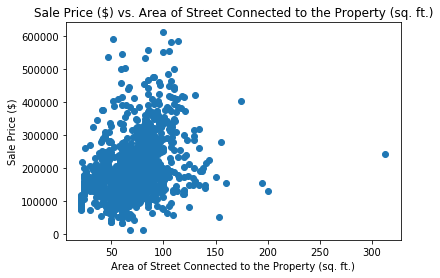

In [51]:
x = df["Lot Frontage"]
y = df["SalePrice"]
plt.title("Sale Price ($) vs. Area of Street Connected to the Property (sq. ft.)")
plt.xlabel("Area of Street Connected to the Property (sq. ft.)")
plt.ylabel("Sale Price ($)")
plt.scatter(x,y);

In [52]:
df[df["Lot Area"] >= 75000]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
471,2116,906426060,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1.5Fin,6,7,1958,2006,Gable,CompShg,Wd Sdng,HdBoard,BrkCmn,472.0,Gd,TA,CBlock,Gd,TA,Gd,Rec,697.0,Unf,0.0,747.0,1444.0,GasA,Gd,Y,SBrkr,1444,700,0,2144,0.0,1.0,2,0,4,1,Gd,7,Typ,2,TA,Attchd,1958.0,Fin,2.0,389.0,TA,TA,Y,0,98,0,0,0,0,NaN,NaN,Shed,500,6,2007,WD,277000
694,2072,905301050,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1Story,7,5,1971,2002,Gable,CompShg,Plywood,Plywood,Stone,351.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,1219.0,Unf,0.0,424.0,1643.0,GasA,TA,Y,SBrkr,1824,0,0,1824,1.0,0.0,2,0,2,1,Gd,5,Typ,2,TA,Attchd,1971.0,Unf,2.0,739.0,TA,TA,Y,380,48,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,302000


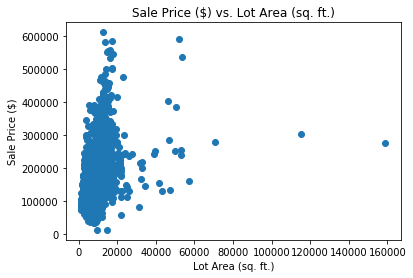

In [53]:
x = df["Lot Area"]
y = df["SalePrice"]
plt.title("Sale Price ($) vs. Lot Area (sq. ft.)")
plt.xlabel("Lot Area (sq. ft.)")
plt.ylabel("Sale Price ($)")
plt.scatter(x,y);

In [54]:
print(df.loc[[1335,471,694],["Lot Area","Lot Frontage","SalePrice"]])
df[["Lot Area","Lot Frontage","SalePrice"]].describe()

      Lot Area  Lot Frontage  SalePrice
1335     27650         313.0     242000
471     159000           NaN     277000
694     115149           NaN     302000


,Lot Area,Lot Frontage,SalePrice
count,2049.000000,1719.000000,2049.000000
mean,10024.677892,68.878999,181479.018058
std,6608.511749,22.472112,79295.913255
min,1300.000000,21.000000,12789.000000
25%,7500.000000,58.000000,129800.000000
50%,9405.000000,68.000000,162500.000000
75%,11500.000000,80.000000,214000.000000
max,159000.000000,313.000000,611657.000000


**These outlier houses should be removed from the dataset, since they are not representative of a regular house's sale price. Their area of street connected to the property and lot area were 5-10 standard deviations above the mean, and their sale price was approximately 1-2 standard deviations above the mean:**

In [55]:
df.drop([1335,471,694], inplace = True)

### Which values are null but shouldn't be?

In [56]:
df.isnull().sum()[df.isnull().sum() != 0]

Lot Frontage       328
Alley             1906
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual        114
Garage Cond        114
Pool QC           2038
Fence             1646
Misc Feature      1983
dtype: int64

#### Lot Frontage: If the house is in an inside lot, these values should be 0.

In [57]:
df[(df["Lot Frontage"].isnull()) & (df["Lot Config"] == "Inside")]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
7,145,535154050,20,RL,NaN,12160,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1959,1959,Hip,CompShg,Plywood,Plywood,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,Rec,1000.0,Unf,0.0,188.0,1188.0,GasA,Fa,Y,SBrkr,1188,0,0,1188,1.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1959.0,RFn,2.0,531.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,5,2010,COD,142000
8,1942,535353130,20,RL,NaN,15783,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,5,5,1952,1952,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,292.0,Unf,0.0,632.0,924.0,GasA,TA,Y,SBrkr,924,0,0,924,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1952.0,Unf,1.0,420.0,TA,TA,Y,0,324,0,0,0,0,NaN,MnPrv,Shed,400,6,2007,WD,112500
23,12,527165230,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,Y,SBrkr,1187,0,0,1187,1.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Attchd,1992.0,Fin,2.0,420.0,TA,TA,Y,483,21,0,0,0,0,NaN,GdPrv,Shed,500,3,2010,WD,185000
27,1534,909277040,50,RL,NaN,11700,Pave,Grvl,IR1,HLS,AllPub,Inside,Mod,Crawfor,Norm,Norm,1Fam,1.5Fin,5,6,1937,1995,Gable,CompShg,WdShing,Wd Shng,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,606.0,Unf,0.0,336.0,942.0,GasA,Ex,Y,SBrkr,1265,673,0,1938,0.0,0.0,2,0,4,1,Gd,7,Min2,1,Gd,Detchd,1937.0,Unf,1.0,240.0,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,198000
50,2511,533221080,160,FV,NaN,2998,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,6,5,2000,2000,Gable,CompShg,MetalSd,MetalSd,BrkFace,513.0,Gd,TA,PConc,Gd,TA,No,GLQ,353.0,Unf,0.0,403.0,756.0,GasA,Ex,Y,SBrkr,768,756,0,1524,0.0,0.0,2,1,2,1,Gd,4,Typ,0,NaN,Detchd,2000.0,Unf,2.0,440.0,TA,TA,Y,0,32,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,166000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1977,498,528344040,60,RL,NaN,16545,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,731.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,781.0,Unf,0.0,503.0,1284.0,GasA,Ex,Y,SBrkr,1310,1140,0,2450,1.0,0.0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,1998.0,Fin,3.0,1069.0,TA,TA,Y,0,126,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,340000
2003,1151,532353050,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1962,1962,Hip,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,737.0,Unf,0.0,175.0,912.0,GasA,TA,Y,SBrkr,912,0,0,912,1.0,0.0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1962.0,Unf,1.0,352.0,TA,TA,Y,140,0,0,0,176,0,NaN,NaN,NaN,0,9,2008,WD,144000
2016,560,532376110,20,RL,NaN,7791,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,RRAe,Norm,1Fam,1Story,5,8,1963,1995,Gable,CompShg,Plywood,Plywood,None,0.0,Gd,Gd,CBlock,TA,TA,No,ALQ,624.0,Unf,0.0,288.0,912.0,GasA,Ex,Y,SBrkr,912,0,0,912,1.0,0.0,1,0,3,1,Gd,6,Typ,0,NaN,Attchd,1963.0,RFn,1.0,300.0,TA

In [58]:
df["Lot Frontage"] = [0 if ((str(df.loc[i, "Lot Frontage"]) == "nan") and (df.loc[i, "Lot Config"] == "Inside")) else df.loc[i, "Lot Frontage"] for i in df.index]
# df[(df["Lot Frontage"].isnull())].loc[:,"Lot Frontage"]


In [59]:
df[(df["Lot Frontage"].isnull()) & (df["Lot Config"] == "Inside")]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice


#### Alley: There are no values in the alley column labeled "NA," so the "NA" values were probably recorded as null.

In [60]:
df[(df["Alley"] == "NA")]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice


In [61]:
df["Alley"] = ["NA" if str(df.loc[i, "Alley"]) == "nan" else df.loc[i, "Alley"] for i in df.index]

#### Masonry Veneer Type and Masonry Veneer Area: Most houses in the USA do not have masonry veneer (brick facade) so null values can be set to 0 (http://eyeonhousing.org/2018/09/vinyl-and-stucco-are-the-most-common-siding-on-new-homes/):

In [62]:
df[(df["Mas Vnr Type"].isnull())]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
22,2393,528142010,60,RL,103.0,12867,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2005,2006,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Ex,TA,Av,Unf,0.0,Unf,0.0,1209.0,1209.0,GasA,Ex,Y,SBrkr,1209,1044,0,2253,0.0,0.0,2,1,3,1,Ex,8,Typ,1,Gd,Attchd,2005.0,Fin,2.0,575.0,TA,TA,Y,243,142,0,0,0,0,NaN,NaN,NaN,0,7,2006,New,344133
41,2383,528110050,20,RL,107.0,13891,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386.0,Unf,0.0,690.0,2076.0,GasA,Ex,Y,SBrkr,2076,0,0,2076,1.0,0.0,2,1,2,1,Ex,7,Typ,1,Gd,Attchd,2006.0,Fin,3.0,850.0,TA,TA,Y,216,229,0,0,0,0,NaN,NaN,NaN,0,9,2006,New,465000
86,539,531371050,20,RL,67.0,10083,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833.0,Unf,0.0,343.0,1176.0,GasA,Ex,Y,SBrkr,1200,0,0,1200,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,2003.0,RFn,2.0,555.0,TA,TA,Y,0,41,0,0,0,0,NaN,NaN,NaN,0,8,2009,WD,184900
212,518,528458020,20,FV,90.0,7993,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2008,2009,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,Unf,0.0,Unf,0.0,1436.0,1436.0,GasA,Ex,Y,SBrkr,1436,0,0,1436,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2008.0,Fin,2.0,529.0,TA,TA,Y,0,121,0,0,0,0,NaN,NaN,NaN,0,10,2009,New,225000
276,2824,908130020,20,RL,75.0,8050,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,TA,TA,PConc,Gd,TA,Av,GLQ,475.0,ALQ,297.0,142.0,914.0,GasA,Ex,Y,SBrkr,914,0,0,914,1.0,0.0,1,0,2,1,Gd,4,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,32,0,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,117250
338,1800,528458150,60,FV,112.0,12217,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,8,5,2007,2007,Hip,CompShg,WdShing,Wd Shng,NaN,NaN,Gd,TA,PConc,Ex,TA,Av,GLQ,745.0,Unf,0.0,210.0,955.0,GasA,Ex,Y,SBrkr,955,925,0,1880,1.0,0.0,2,1,3,1,Ex,8,Typ,1,Gd,Attchd,2007.0,Fin,3.0,880.0,TA,TA,Y,168,127,0,0,0,0,NaN,NaN,NaN,0,12,2007,New,310013
431,1455,907251090,60,RL,75.0,9473,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804.0,Unf,0.0,324.0,1128.0,GasA,Ex,Y,SBrkr,1128,903,0,2031,1.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2002.0,RFn,2.0,577.0,TA,TA,Y,0,211,0,0,0,0,NaN,NaN,NaN,0,3,2008,WD,237000
451,1120,528439010,20,RL,87.0,10037,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Feedr,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,GLQ,666.0,Unf,0.0,794.0,1460.0,GasA,Ex,Y,SBrkr,1460,0,0,1460,0.0,0.0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2006.0,Fin,2.0,480.0,TA,TA,Y,0,20,0,0,0,0,NaN,NaN,NaN,0,8,2008,WD,247000
591,1841,533208040,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106.0,Unf,0.0,135.0,1241.0,GasA,Ex,Y,SBrkr,1241,0,0,1241,1.0,0.0,1,1,1,1,Gd,4,Typ,0,NaN,Attchd,2007.0,Fin,2.0,569.0,TA,TA,Y

In [63]:
df["Mas Vnr Type"] = ["None" if str(df.loc[i, "Mas Vnr Type"]) == "nan" else df.loc[i, "Mas Vnr Type"] for i in df.index]
df["Mas Vnr Area"] = [0 if str(df.loc[i, "Mas Vnr Area"]) == "nan" else df.loc[i, "Mas Vnr Area"] for i in df.index]


#### Basement Quality Type 1, Basement Condition Type 1, Basement Exposure Type 1, Rating of Basement Finished Area Type 1, Basement Finished Area Type 1, Rating of Basement Finished Area Type 2, Basement Finished Area Type 2, Basement Area Type 2, Basement Unfinished Area, Total Basement Square Feet, Basement Full Bathrooms, Basement Half Bathrooms: These values should be 0 or NA if the Basement Finished Area Type 1 or the Total Basement Square Feet is 0.

In [64]:
df["Bsmt Qual"] = ["NA" if (str(df.loc[i, "Bsmt Qual"]) == "nan" and (df.loc[i,"BsmtFin SF 1"] == 0 or df.loc[i,"Total Bsmt SF"] == 0)) else df.loc[i, "Bsmt Qual"] for i in df.index]
df["Bsmt Cond"] = ["NA" if (str(df.loc[i, "Bsmt Cond"]) == "nan" and (df.loc[i,"BsmtFin SF 1"] == 0 or df.loc[i,"Total Bsmt SF"] == 0)) else df.loc[i, "Bsmt Cond"] for i in df.index]
df["Bsmt Exposure"] = ["NA" if (str(df.loc[i, "Bsmt Exposure"]) == "nan" and (df.loc[i,"BsmtFin SF 1"] == 0 or df.loc[i,"Total Bsmt SF"] == 0)) else df.loc[i, "Bsmt Exposure"] for i in df.index]
df["BsmtFin Type 1"] = ["NA" if (str(df.loc[i, "BsmtFin Type 1"]) == "nan" and (df.loc[i,"BsmtFin SF 1"] == 0 or df.loc[i,"Total Bsmt SF"] == 0)) else df.loc[i, "BsmtFin Type 1"] for i in df.index]
df["BsmtFin SF 1"] = [0 if (str(df.loc[i, "BsmtFin SF 1"]) == "nan" and (df.loc[i,"BsmtFin SF 1"] == 0 or df.loc[i,"Total Bsmt SF"] == 0)) else df.loc[i, "BsmtFin SF 1"] for i in df.index]
df["BsmtFin Type 2"] = ["NA" if (str(df.loc[i, "BsmtFin Type 2"]) == "nan" and (df.loc[i,"BsmtFin SF 1"] == 0 or df.loc[i,"Total Bsmt SF"] == 0)) else df.loc[i, "BsmtFin Type 2"] for i in df.index]
df["BsmtFin SF 2"] = [0 if (str(df.loc[i, "BsmtFin SF 2"]) == "nan" and (df.loc[i,"BsmtFin SF 1"] == 0 or df.loc[i,"Total Bsmt SF"] == 0)) else df.loc[i, "BsmtFin SF 2"] for i in df.index]
df["Bsmt Unf SF"] = [0 if (str(df.loc[i, "Bsmt Unf SF"]) == "nan" and (df.loc[i,"BsmtFin SF 1"] == 0 or df.loc[i,"Total Bsmt SF"] == 0)) else df.loc[i, "Bsmt Unf SF"] for i in df.index]
df["Total Bsmt SF"] = [0 if (str(df.loc[i, "Total Bsmt SF"]) == "nan" and (df.loc[i,"BsmtFin SF 1"] == 0 or df.loc[i,"Total Bsmt SF"] == 0)) else df.loc[i, "Total Bsmt SF"] for i in df.index]
df["Bsmt Full Bath"] = [0 if (str(df.loc[i, "Bsmt Full Bath"]) == "nan" and (df.loc[i,"BsmtFin SF 1"] == 0 or df.loc[i,"Total Bsmt SF"] == 0)) else df.loc[i, "Bsmt Full Bath"] for i in df.index]
df["Bsmt Half Bath"] = [0 if (str(df.loc[i, "Bsmt Half Bath"]) == "nan" and (df.loc[i,"BsmtFin SF 1"] == 0 or df.loc[i,"Total Bsmt SF"] == 0)) else df.loc[i, "Bsmt Half Bath"] for i in df.index]


#### One remaining house has null values for Basement Quality Type 1, Basement Condition Type 1, Basement Exposure Type 1, Rating of Basement Finished Area Type 1, Basement Finished Area Type 1, Rating of Basement Finished Area Type 2, Basement Finished Area Type 2, Basement Area Type 2, Basement Unfinished Area, Total Basement Square Feet, Basement Full Bathrooms, and Basement Half Bathrooms. This house most likely has no basement.

In [65]:
bsmt_list = ["Bsmt Qual", "Bsmt Cond", "Bsmt Exposure", "BsmtFin Type 1", "BsmtFin SF 1", "BsmtFin Type 2", "BsmtFin SF 2", "Bsmt Unf SF", "Total Bsmt SF", "Bsmt Full Bath", "Bsmt Half Bath"]

for i in bsmt_list:
    if "SF" in i or "Bath" in i:
        df.loc[1327,i] = 0
    else:
        df.loc[1327,i] = "NA"

#### Firelace Quality: These values should be 0 if the Number of Fireplaces is 0.

In [66]:
df[(df["Fireplace Qu"].isnull())]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
2,153,535304180,20,RL,68.0,7922,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
6,2827,908186070,180,RM,35.0,3675,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,SFoyer,6,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,82.0,TA,TA,PConc,Gd,TA,Gd,GLQ,547.0,Unf,0.0,0.0,547.0,GasA,Gd,Y,SBrkr,1072,0,0,1072,1.0,0.0,2,0,2,1,TA,5,Typ,0,NaN,Basment,2005.0,Fin,2.0,525.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,6,2006,New,140000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2034,2775,907175060,20,RL,79.0,9236,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,6,5,1997,1997,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,PConc,Gd,TA,Gd,GLQ,1200.0,Unf,0.0,279.0,1479.0,GasA,Ex,Y,SBrkr,1494,0,0,1494,1.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,1997.0,RFn,2.0,576.0,TA,TA,Y,168,27,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,217000
2038,1892,534401200,80,RL,80.0,9200,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,SLvl,6,5,1965,1965,Gable,CompShg,HdBoard,HdBoard,BrkFace,98.0,TA,TA,CBlock,TA,TA,Gd,GLQ,494.0,Unf,0.0,548.0,1042.0,GasA,TA,Y,SBrkr,1042,0,0,1042,0.0,0.0,2,0,3,1,TA,5,Typ,0,NaN,Attchd,1965.0,RFn,2.0,440.0,TA,TA,Y,192,0,0,0,0,0,NaN,GdPrv,NaN,0,5,2007,WD,161000
2039,2288,923228220,160,RM,21.0,1495,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,6,1970,1970,Gable,CompShg,CemntBd,CmentBd,BrkFace,189.0,TA,TA,CBlock,TA,TA,No,ALQ,384.0,Unf,0.0,162.0,546.0,GasA,Ex,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,64,0,0,0,0,Na

In [67]:
df["Fireplace Qu"] = ["NA" if (str(df.loc[i, "Fireplace Qu"]) == "nan" and df.loc[i,"Fireplaces"] == 0) else df.loc[i, "Fireplace Qu"] for i in df.index]


#### Garage Type, Garage Year Built, Garage Finish, Garage Number of Cars, Garage Quality, and Garage Condition: These values should be 0 or NA if the Garage Area is 0. The Garage Year Built can be estimated as the year the house was built if the house is from after 1960, and the year of the remodel if the house is from before 1960: https://www.thespruce.com/benefits-of-detached-garage-1398098.

In [68]:
df[(df["Garage Type"].isnull())]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
28,2243,911103060,190,C (all),75.0,8250,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,2fmCon,2Story,5,6,1895,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,957.0,957.0,GasA,Fa,N,SBrkr,1034,957,0,1991,0.0,0.0,2,0,4,2,TA,9,Typ,0,NA,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,133,0,0,0,NaN,NaN,NaN,0,6,2007,WD,119600
53,330,923226250,160,RM,21.0,1476,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,GLQ,176.0,Unf,0.0,370.0,546.0,GasA,Ex,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NA,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,200,26,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,76000
65,2278,923202134,20,RL,70.0,8402,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Feedr,Norm,1Fam,1Story,5,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,ALQ,206.0,Unf,0.0,914.0,1120.0,GasA,Ex,Y,SBrkr,1120,0,0,1120,0.0,0.0,1,0,3,1,TA,6,Typ,0,NA,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,30,0,0,0,0,NaN,NaN,NaN,0,12,2007,New,147000
79,2235,910201050,50,RM,50.0,7288,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,5,7,1925,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,Gd,BrkTil,TA,Po,No,Unf,0.0,Unf,0.0,936.0,936.0,GasA,Ex,Y,SBrkr,936,665,0,1601,0.0,0.0,2,0,3,1,TA,6,Typ,0,NA,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,0,176,0,0,NaN,NaN,NaN,0,9,2007,WD,129850
101,2084,905476170,30,RL,58.0,9098,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,7,1920,2002,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,Mn,ALQ,348.0,Unf,0.0,180.0,528.0,GasA,Ex,Y,SBrkr,605,0,0,605,1.0,0.0,1,0,2,1,TA,5,Typ,0,NA,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,144,0,0,0,NaN,NaN,NaN,0,7,2007,WD,86000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,325,923204150,90,RL,94.0,9400,Pave,NA,Reg,Low,AllPub,Corner,Gtl,Mitchel,Norm,Norm,Duplex,2Story,6,5,1971,1971,Mansard,CompShg,MetalSd,Wd Shng,None,0.0,TA,TA,CBlock,TA,TA,Av,Unf,0.0,Unf,0.0,912.0,912.0,GasA,TA,Y,SBrkr,912,912,0,1824,0.0,0.0,2,2,4,2,TA,8,Typ,0,NA,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,128,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,139000
2010,2880,911175410,30,C (all),69.0,12366,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,1Story,3,5,1945,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,Slab,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,GasA,TA,N,SBrkr,729,0,0,729,0.0,0.0,1,0,2,1,TA,5,Mod,0,NA,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,23,0,0,0,NaN,NaN,NaN,0,10,2006,WD,51689
2027,2628,535456010,90,RL,75.0,8512,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,Duplex,1Story,5,5,1960,1960,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,Fa,No,Unf,0.0,Unf,0.0,1556.0,1556.0,GasA,TA,Y,SBrkr,1556,0,0,1556,0.0,0.0,2,0,4,2,TA,8,Typ,0,NA,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,119000
2039,2288,923228220,160,RM,2

In [69]:
df["Garage Type"] = ["NA" if (str(df.loc[i, "Garage Type"]) == "nan" and df.loc[i,"Garage Area"] == 0) else df.loc[i, "Garage Type"] for i in df.index]
df["Garage Yr Blt"] = [df.loc[i,"Year Built"] if (str(df.loc[i, "Garage Yr Blt"]) == "nan" and df.loc[i,"Garage Area"] == 0 and df.loc[i,"Year Built"] >= 1960) else df.loc[i, "Garage Yr Blt"] for i in df.index]
df["Garage Yr Blt"] = [df.loc[i,"Year Remod/Add"] if (str(df.loc[i, "Garage Yr Blt"]) == "nan" and df.loc[i,"Garage Area"] == 0 and df.loc[i,"Year Built"] < 1960) else df.loc[i, "Garage Yr Blt"] for i in df.index]
df["Garage Finish"] = ["NA" if (str(df.loc[i, "Garage Finish"]) == "nan" and df.loc[i,"Garage Area"] == 0) else df.loc[i, "Garage Finish"] for i in df.index]
df["Garage Cars"] = [0 if (str(df.loc[i, "Garage Cars"]) == "nan" and df.loc[i,"Garage Area"] == 0) else df.loc[i, "Garage Cars"] for i in df.index]
df["Garage Qual"] = ["NA" if (str(df.loc[i, "Garage Qual"]) == "nan" and df.loc[i,"Garage Area"] == 0) else df.loc[i, "Garage Qual"] for i in df.index]
df["Garage Cond"] = ["NA" if (str(df.loc[i, "Garage Cond"]) == "nan" and df.loc[i,"Garage Area"] == 0) else df.loc[i, "Garage Cond"] for i in df.index]


#### Pool Quality, Fence Quality, and Miscellaneous Feature: The Pool Quality, Fence Quality, and Miscellaneous Feature were never recorded as NA in the dataset, so all the null values must be NA.

In [70]:
df[(df["Pool QC"] == "NA")]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice


In [71]:
df[(df["Fence"] == "NA")]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice


In [72]:
df[(df["Misc Feature"] == "NA")]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice


In [73]:
df["Pool QC"] = ["NA" if str(df.loc[i, "Pool QC"]) == "nan" else df.loc[i, "Pool QC"] for i in df.index]
df["Fence"] = ["NA" if str(df.loc[i, "Fence"]) == "nan" else df.loc[i, "Fence"] for i in df.index]
df["Misc Feature"] = ["NA" if str(df.loc[i, "Misc Feature"]) == "nan" else df.loc[i, "Misc Feature"] for i in df.index]


#### The entry for the house that has null Garage Year Built, Garage Finish, Garage Cars, Garage Area, Garage Quality, and Garage Condition can be dropped. The entry for the house that has null Type 2 Basement Finish can be set to Unfinished, since 85% of the values in that feature are Unfinished:

In [74]:
df[(df["Garage Yr Blt"].isnull())]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1712,2237,910201180,70,RM,50.0,9060,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NA,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NA,MnPrv,NA,0,3,2007,WD,150909


In [75]:
df.drop(1712, inplace = True)

In [76]:
df[(df["Garage Yr Blt"].isnull())]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice


In [77]:
df[df["BsmtFin Type 2"].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1147,445,528142130,20,RL,85.0,10655,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,No,GLQ,1124.0,NaN,479.0,1603.0,3206.0,GasA,Ex,Y,SBrkr,1629,0,0,1629,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2003.0,RFn,3.0,880.0,TA,TA,Y,0,0,0,0,0,0,NA,NA,NA,0,10,2009,WD,284000


In [78]:
df.loc[1147,"BsmtFin Type 2"] = "Unf"

In [79]:
df.isnull().sum()[df.isnull().sum() != 0]

Lot Frontage    138
dtype: int64

### The remaining Lot Frontage null values can be approximately replaced using their average value:

In [80]:
avg_lot_frontage = df.loc[(df["Lot Frontage"].notnull()),"Lot Frontage"].mean()
df.loc[(df["Lot Frontage"].isnull()),"Lot Frontage"] = avg_lot_frontage

In [81]:
df.isnull().sum()[df.isnull().sum() != 0]

Series([], dtype: int64)

### This code checks the means/modes of 4 columns, in order to use these values for the remaining null values in the training dataset (see more information in the "Repeat Data Cleaning and Pre-Processing for Test Dataset" section below):

In [82]:
Electrical_mode = df["Electrical"].mode()[0]
Garage_Yr_Blt_mean = df["Garage Yr Blt"].mean()
Garage_Finish_mode = df["Garage Finish"].mode()[0]
Garage_Qual_mode = df["Garage Qual"].mode()[0]
Garage_Cond_mode = df["Garage Cond"].mode()[0]

## Pre-Processing

### The ordinal values should be replaced with ordered labels, and the nominal values should be replaced with arbitrary labels. The nominal vales could also be one-hot encoded, but then the data would have hundreds of features, causing overfitting, so I will not use this method.

In [83]:
df["Street"] = df["Street"].apply(lambda x: {'Grvl':0, 'Pave':1}[x])
df["Utilities"] = df["Utilities"].apply(lambda x: {'ELO':0, 'NoSeWa':1, 'NoSewr':2, 'AllPub':3}[x])
df["Exter Qual"] = df["Exter Qual"].apply(lambda x: {'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4}[x])
df["Exter Cond"] = df["Exter Cond"].apply(lambda x: {'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4}[x])
df["Bsmt Qual"] = df["Bsmt Qual"].apply(lambda x: {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}[x])
df["Bsmt Cond"] = df["Bsmt Cond"].apply(lambda x: {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}[x])
df["Bsmt Exposure"] = df["Bsmt Exposure"].apply(lambda x: {'NA':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4}[x])
df["BsmtFin Type 1"] = df["BsmtFin Type 1"].apply(lambda x: {'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, "BLQ":4, "ALQ":5, "GLQ": 6}[x])
df["BsmtFin Type 2"] = df["BsmtFin Type 2"].apply(lambda x: {'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, "BLQ":4, "ALQ":5, "GLQ": 6}[x])
df["Heating QC"] = df["Heating QC"].apply(lambda x: {'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4}[x])
df["Central Air"] = df["Central Air"].apply(lambda x: {'N':0, 'Y':1}[x])
df["Electrical"] = df["Electrical"].apply(lambda x: {'Mix':0, 'FuseP':1, 'FuseF':2, 'FuseA':3, 'SBrkr': 4}[x])
df["Kitchen Qual"] = df["Kitchen Qual"].apply(lambda x: {'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4}[x])
df["Functional"] = df["Functional"].apply(lambda x: {'Sal':0, 'Sev':1, 'Maj2':2, 'Maj1':3, "Mod":4, "Min2":5, "Min1":6, "Typ":7}[x])
df["Fireplace Qu"] = df["Fireplace Qu"].apply(lambda x: {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}[x])
df["Garage Finish"] = df["Garage Finish"].apply(lambda x: {'NA':0, 'Unf':1, 'RFn':2, 'Fin':3}[x])
df["Garage Qual"] = df["Garage Qual"].apply(lambda x: {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}[x])
df["Garage Cond"] = df["Garage Cond"].apply(lambda x: {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}[x])
df["Paved Drive"] = df["Paved Drive"].apply(lambda x: {'N':0, 'P':1, 'Y':2}[x])
df["Pool QC"] = df["Pool QC"].apply(lambda x: {'NA':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4}[x])
df["Fence"] = df["Fence"].apply(lambda x: {'NA':0, 'MnWw':1, 'GdWo':2, 'MnPrv':3, 'GdPrv':4}[x])
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,61.89827,13517,1,NA,IR1,Lvl,3,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,3,2,CBlock,3,3,1,6,533.0,1,0.0,192.0,725.0,GasA,4,1,4,725,754,0,1479,0.0,0.0,2,1,3,1,3,6,7,0,0,Attchd,1976.0,2,2.0,475.0,3,3,2,0,44,0,0,0,0,0,0,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43.00000,11492,1,NA,IR1,Lvl,3,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,3,2,PConc,4,3,1,6,637.0,1,0.0,276.0,913.0,GasA,4,1,4,913,1209,0,2122,1.0,0.0,2,1,4,1,3,8,7,1,3,Attchd,1997.0,2,2.0,559.0,3,3,2,0,74,0,0,0,0,0,0,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68.00000,7922,1,NA,Reg,Lvl,3,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,3,CBlock,3,3,1,6,731.0,1,0.0,326.0,1057.0,GasA,2,1,4,1057,0,0,1057,1.0,0.0,1,0,3,1,3,5,7,0,0,Detchd,1953.0,1,1.0,246.0,3,3,2,0,52,0,0,0,0,0,0,NA,0,1,2010,WD,109000
3,318,916386060,60,RL,73.00000,9802,1,NA,Reg,Lvl,3,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,2,PConc,4,3,1,1,0.0,1,0.0,384.0,384.0,GasA,3,1,4,744,700,0,1444,0.0,0.0,2,1,3,1,2,7,7,0,0,BuiltIn,2007.0,3,2.0,400.0,3,3,2,100,0,0,0,0,0,0,0,NA,0,4,2010,WD,174000
4,255,906425045,50,RL,82.00000,14235,1,NA,IR1,Lvl,3,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,2,2,PConc,2,4,1,1,0.0,1,0.0,676.0,676.0,GasA,2,1,4,831,614,0,1445,0.0,0.0,2,0,3,1,2,6,7,0,0,Detchd,1957.0,1,2.0,484.0,3,3,0,0,59,0,0,0,0,0,0,NA,0,3,2010,WD,138500


In [84]:
columns_to_label_encode = ["MS SubClass",
                           "MS Zoning",
                           "Alley",
                           "Lot Shape",
                           "Land Contour",
                           "Lot Config",
                           "Land Slope",
                           "Neighborhood",
                           "Condition 1",
                           "Condition 2",
                           "Bldg Type",
                           "House Style",
                           "Roof Style",
                           "Roof Matl",
                           "Exterior 1st",
                           "Exterior 2nd",
                           "Mas Vnr Type",
                           "Foundation",
                           "Heating",
                           "Garage Type",
                           "Misc Feature",
                           "Sale Type"]

le_list = []
for column in columns_to_label_encode:
    le = LabelEncoder()
    if column == "Roof Matl":
        le.fit(np.append(df["Roof Matl"].tolist(), ["Metal","Roll"]))   
    elif column == "Exterior 1st":
        le.fit(np.append(df["Exterior 1st"].tolist(), ["PreCast", "Other"]))
    elif column == "Exterior 2nd":
        le.fit(np.append(df["Exterior 2nd"].tolist(), ["PreCast", "Other", "CBlock"])) 
    elif column == "Mas Vnr Type":
        le.fit(np.append(df["Mas Vnr Type"].tolist(), "CBlock"))
    elif column == "Heating":
        le.fit(np.append(df["Heating"].tolist(), "Floor"))
    elif column == "Sale Type":
        le.fit(np.append(df["Sale Type"].tolist(), "VWD"))
    else:
        le.fit(df[column])
    le_list.append(le)
    df[column] = le.transform(df[column])
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,10,5,61.89827,13517,1,1,0,3,3,1,0,22,5,2,0,5,6,8,1976,2005,1,0,6,10,1,289.0,3,2,1,3,3,1,6,533.0,1,0.0,192.0,725.0,1,4,1,4,725,754,0,1479,0.0,0.0,2,1,3,1,3,6,7,0,0,1,1976.0,2,2.0,475.0,3,3,2,0,44,0,0,0,0,0,0,1,0,3,2010,9,130500
1,544,531379050,10,5,43.00000,11492,1,1,0,3,3,1,0,23,2,2,0,5,7,5,1996,1997,1,0,14,14,1,132.0,3,2,2,4,3,1,6,637.0,1,0.0,276.0,913.0,1,4,1,4,913,1209,0,2122,1.0,0.0,2,1,4,1,3,8,7,1,3,1,1997.0,2,2.0,559.0,3,3,2,0,74,0,0,0,0,0,0,1,0,4,2009,9,220000
2,153,535304180,5,5,68.00000,7922,1,1,3,3,3,4,0,15,2,2,0,2,5,7,1953,2007,1,0,14,14,3,0.0,2,3,1,3,3,1,6,731.0,1,0.0,326.0,1057.0,1,2,1,4,1057,0,0,1057,1.0,0.0,1,0,3,1,3,5,7,0,0,5,1953.0,1,1.0,246.0,3,3,2,0,52,0,0,0,0,0,0,1,0,1,2010,9,109000
3,318,916386060,10,5,73.00000,9802,1,1,3,3,3,4,0,26,2,2,0,5,5,5,2006,2007,1,0,14,14,3,0.0,2,2,2,4,3,1,1,0.0,1,0.0,384.0,384.0,1,3,1,4,744,700,0,1444,0.0,0.0,2,1,3,1,2,7,7,0,0,3,2007.0,3,2.0,400.0,3,3,2,100,0,0,0,0,0,0,0,1,0,4,2010,9,174000
4,255,906425045,9,5,82.00000,14235,1,1,0,3,3,4,0,23,2,2,0,0,6,8,1900,1993,1,0,15,10,3,0.0,2,2,2,2,4,1,1,0.0,1,0.0,676.0,676.0,1,2,1,4,831,614,0,1445,0.0,0.0,2,0,3,1,2,6,7,0,0,5,1957.0,1,2.0,484.0,3,3,0,0,59,0,0,0,0,0,0,1,0,3,2010,9,138500


In [85]:
dump(le_list, '../models/label_encoders_for_nominal_columns.joblib') 

['../models/label_encoders_for_nominal_columns.joblib']

### Add interaction terms for features that are highly correlated:

#### These features were found to be highly correlated with each other (over 80%) but not with the target variable, so I will replace them with interaction terms and drop the original features.

In [86]:
df.corr()["SalePrice"]

MS SubClass        0.007077
MS Zoning         -0.124938
Lot Frontage       0.228657
Lot Area           0.351723
Street             0.069838
Alley              0.112622
Lot Shape         -0.299077
Land Contour      -0.044689
Utilities          0.026392
Lot Config        -0.066558
Land Slope         0.047600
Neighborhood       0.210029
Condition 1        0.086364
Condition 2        0.053586
Bldg Type         -0.040989
House Style        0.171262
Overall Qual       0.803819
Overall Cond      -0.098091
Year Built         0.573575
Year Remod/Add     0.550429
Roof Style         0.249882
Roof Matl          0.082542
Exterior 1st       0.124277
Exterior 2nd       0.127991
Mas Vnr Type      -0.139938
Mas Vnr Area       0.510505
Exter Qual         0.716308
Exter Cond         0.036785
Foundation         0.421173
Bsmt Qual          0.613242
Bsmt Cond          0.225159
Bsmt Exposure      0.424281
BsmtFin Type 1     0.350385
BsmtFin SF 1       0.445371
BsmtFin Type 2     0.015166
BsmtFin SF 2       0

In [87]:
# The correlation between Exterior 1st and Exterior 2nd is 0.8526774629570256
# The correlation between Exterior 2nd and Exterior 1st is 0.8526774629570256
# The correlation between Gr Liv Area and TotRms AbvGrd is 0.8129032858262648
# The correlation between TotRms AbvGrd and Gr Liv Area is 0.8129032858262648
# The correlation between Fireplaces and Fireplace Qu is 0.8615298135854411
# The correlation between Fireplace Qu and Fireplaces is 0.8615298135854411
# The correlation between Garage Cars and Garage Area is 0.897345748523395
# The correlation between Garage Area and Garage Cars is 0.897345748523395
# The correlation between Garage Qual and Garage Cond is 0.9501132245062401
# The correlation between Garage Cond and Garage Qual is 0.9501132245062401
# The correlation between Pool Area and Pool QC is 0.8575433358181249
# The correlation between Pool QC and Pool Area is 0.8575433358181249
# The correlation between Year Built and Garage Yr Blt is 0.8085427974150865
# The correlation between Garage Yr Blt and Year Built is 0.8085427974150865
# The correlation between BsmtFin Type 2 and BsmtFin SF 2 is 0.8403132295194292
# The correlation between BsmtFin SF 2 and BsmtFin Type 2 is 0.8403132295194292

df["Exterior Combined"] = df["Exterior 1st"] * df["Exterior 2nd"]
df.drop(["Exterior 1st", "Exterior 2nd"], axis = 1, inplace = True)
df["Rooms Combined"] = df["Gr Liv Area"] * df["TotRms AbvGrd"]
df.drop(["Gr Liv Area", "TotRms AbvGrd"], axis = 1, inplace = True)
df["Fireplace Combined"] = df["Fireplaces"] * df["Fireplace Qu"]
df.drop(["Fireplaces", "Fireplace Qu"], axis = 1, inplace = True)
df["Garage Combined"] = df["Garage Cars"] * df["Garage Area"] * df["Garage Qual"] * df["Garage Cond"]
df.drop(["Garage Cars", "Garage Area", "Garage Qual", "Garage Cond"], axis = 1, inplace = True)
df["Pool Combined"] = df["Pool Area"] * df["Pool QC"]
df.drop(["Pool Area", "Pool QC"], axis = 1, inplace = True)
df["Bsmt Type 2 Combined"] = df["BsmtFin Type 2"] * df["BsmtFin SF 2"]
df.drop(["BsmtFin Type 2", "BsmtFin SF 2"], axis = 1, inplace = True)
df["Year Combined"] = df["Year Built"] * df["Garage Yr Blt"]
df.drop(["Year Built", "Garage Yr Blt"], axis = 1, inplace = True)

df.corr()["SalePrice"]

MS SubClass             0.007077
MS Zoning              -0.124938
Lot Frontage            0.228657
Lot Area                0.351723
Street                  0.069838
Alley                   0.112622
Lot Shape              -0.299077
Land Contour           -0.044689
Utilities               0.026392
Lot Config             -0.066558
Land Slope              0.047600
Neighborhood            0.210029
Condition 1             0.086364
Condition 2             0.053586
Bldg Type              -0.040989
House Style             0.171262
Overall Qual            0.803819
Overall Cond           -0.098091
Year Remod/Add          0.550429
Roof Style              0.249882
Roof Matl               0.082542
Mas Vnr Type           -0.139938
Mas Vnr Area            0.510505
Exter Qual              0.716308
Exter Cond              0.036785
Foundation              0.421173
Bsmt Qual               0.613242
Bsmt Cond               0.225159
Bsmt Exposure           0.424281
BsmtFin Type 1          0.350385
BsmtFin SF

**All the combined columns are either approximately the same as the originals, or better, and they avoid the collinearity of the originals.**

### Add polynomial terms, if appropriate:

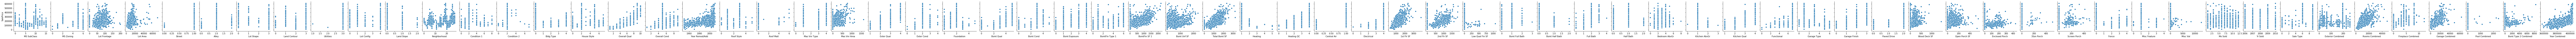

In [88]:
sns.pairplot(df, x_vars = df.columns.drop(["Id","PID","SalePrice"]), y_vars = "SalePrice")

### Year Combined and Year Remodeled Appear to Have a Quadratic Component in the Scatterplots, So I Will Add Columns for Those Features Squared:

In [89]:
# Year Combined, Year Remod/Add
df["Year Combined Squared"] = df["Year Combined"]**2
df["Year Remod/Add Squared"] = df["Year Remod/Add"]**2

### Drop features that are collinear, if any remain:

In [90]:
X = df.drop(["Id","PID","SalePrice"], axis = 1)
X.corr()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Remod/Add,Roof Style,Roof Matl,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,Functional,Garage Type,Garage Finish,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Exterior Combined,Rooms Combined,Fireplace Combined,Garage Combined,Pool Combined,Bsmt Type 2 Combined,Year Combined,Year Combined Squared,Year Remod/Add Squared
MS SubClass,1.000000,0.090566,0.166722,0.164525,-0.005677,-0.136306,-0.027878,-0.028383,0.013967,-0.079479,-0.039466,-0.044356,0.007078,0.004707,-0.462663,0.436454,-0.069337,0.086269,-0.098293,-0.115491,0.014850,-0.015283,-0.049445,-0.140228,0.063702,-0.076845,-0.136766,-0.089428,-0.002762,-0.188266,-0.157850,-0.043408,-0.228857,0.083362,-0.080188,-0.083633,-0.051057,-0.152822,0.479523,0.055238,-0.112706,0.028017,0.140871,0.243242,0.451719,0.291789,-0.108363,-0.003904,0.149392,-0.075488,-0.059325,0.036087,-0.002586,0.053189,-0.042901,-0.002514,0.054497,0.012269,0.017393,0.037009,-0.008438,0.070190,0.084093,0.358631,0.037957,0.046901,0.046658,-0.038533,-0.172978,-0.172545,-0.098451
MS Zoning,0.090566,1.000000,-0.030631,-0.005811,0.120433,-0.371942,0.044164,-0.030772,0.020946,0.000071,0.003601,-0.244668,-0.002982,0.014172,-0.077205,-0.074817,-0.124795,0.161808,-0.187935,0.002169,0.012010,-0.013875,-0.039197,-0.189612,0.119904,-0.260916,-0.132292,0.004470,0.005733,-0.081535,-0.012622,-0.049450,-0.052414,0.005364,-0.136123,0.014863,-0.040360,-0.032944,-0.016507,0.021880,-0.018778,0.045709,-0.152461,-0.105750,0.063625,0.041884,-0.157363,-0.021199,0.107746,-0.124081,-0.017606,0.022651,-0.171100,0.082575,0.002697,0.031315,0.101363,0.011454,0.019659,-0.021469,-0.014801,0.085998,-0.013943,-0.005758,0.008551,-0.109832,0.002756,0.022533,-0.274239,-0.275456,-0.188331
Lot Frontage,0.166722,-0.030631,1.000000,0.270923,-0.032377,-0.047879,0.061388,-0.011253,-0.016577,-0.236805,-0.001507,0.092469,-0.055966,-0.014209,-0.328472,-0.016412,0.117893,-0.021353,0.055262,0.101964,0.040432,0.004058,0.121786,0.093863,-0.020467,0.036599,0.035880,-0.007397,0.101883,-0.035480,0.046950,0.135657,0.195713,0.004469,0.061243,0.023271,0.010789,0.258251,-0.009253,-0.000536,0.011265,-0.011132,0.065764,-0.010294,0.136700,0.014613,0.116411,-0.013986,-0.148103,0.098153,-0.013645,0.022028,0.107241,0.018545,0.031547,0.055998,0.019994,-0.000800,-0.009558,-0.011343,-0.002161,-0.049268,0.074090,0.210542,0.104899,0.233853,0.058832,0.015698,0.038246,0.039205,0.055629
Lot Area,0.164525,-0.005811,0.270923,1.000000,-0.023663,-0.041345,-0.251283,-0.088637,-0.039479,-0.163128,0.205222,0.049749,0.044940,0.012421,-0.364775,-0.007526,0.109772,-0.036118,0.032161,0.114567,0.239734,-0.048965,0.137483,0.088309,0.032974,0.032805,0.051180,-0.018177,0.179753,0.036644,0.185010,0.050680,0.268199,0.001193,0.034513,0.064837,0.046179,0.409866,0.029651,0.005223,0.127296,-0.020433,0.136859,0.073670,0.169969,-0.010640,0.118760,-0.119183,-0.230526,0.137535,-0.012576,0.177035,0.138010,0.031124,0.028663,0.097023,-0.027510,0.031179,0.040546,0.008888,-0.023570,-0.009880,0.042307,0.333017,0.295375,0.309012,0.083216,0.067869,0.037479,0.036452,0.032056
Street,-0.005677,0.120433,-0.032377,-0.023663,1.000000,-0.003291,-0.026484,0.054143,0.167656,-0.013231,-0.022977,0.036735,-0.045465,0.000589,0.010936,0.022008,0.063316,0.007045,0.072814,-0.012039,0.006205,0.009178,0.021483,0.069043,0.013515,0.031827,0.059575,0.051221,-0.004954,0.043004,0.032264,0.017692,0.058318,0.006302,0.079035,0.083185,0.024844,0.044829,0.038237,0.006338,0.015758,0.0146

In [91]:
for i in range(0,len(X.corr().index)):
    for j in range(0,len(X.corr().columns)):
        if (X.corr().iloc[i,j] > 0.8) and (i != j):
            print("The correlation between", X.corr().index[i], "and", X.corr().columns[j], "is", X.corr().iloc[i,j])

The correlation between Year Remod/Add and Year Remod/Add Squared is 0.9999938368778474
The correlation between Year Combined and Year Combined Squared is 0.9999084912888914
The correlation between Year Combined Squared and Year Combined is 0.9999084912888914
The correlation between Year Remod/Add Squared and Year Remod/Add is 0.9999938368778474


**No collinear features remain to drop after I combined the collinear features above in the "Add interaction terms for features that are highly correlated" section. The only collinear features are the features with their own polynomial terms, as expected.**

### Use the standard scaler to scale all the features the same way so they have equal weight in our models:

In [92]:
ss2 = StandardScaler()
X = df.drop(["Id","PID","SalePrice"], axis = 1)
X_scaled = ss2.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, index = X.index)
for i in X.index:
     X.loc[i,:] = X_scaled_df.loc[i,:].tolist()
dump(ss2, '../models/scaler_for_train_data.joblib') 
X.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Remod/Add,Roof Style,Roof Matl,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,Functional,Garage Type,Garage Finish,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Exterior Combined,Rooms Combined,Fireplace Combined,Garage Combined,Pool Combined,Bsmt Type 2 Combined,Year Combined,Year Combined Squared,Year Remod/Add Squared
0,0.793283,0.049879,0.000000,0.693608,0.058607,0.056156,-1.364069,0.312444,0.029681,-1.298802,-0.213499,1.054276,3.392571,-0.010052,-0.422218,1.050487,-0.075980,2.207546,0.992443,-0.489236,-0.10588,-1.405463,1.114878,1.01518,-0.230598,-0.543065,-0.540969,0.123809,-0.580364,1.148413,0.217725,-0.843456,-0.768420,-0.107533,0.873803,0.27213,0.285204,-1.149570,0.998633,-0.108137,-0.816815,-0.250195,0.771578,1.255190,0.189942,-0.204881,0.730080,0.230136,-0.762123,0.309380,0.311464,-0.729709,-0.049263,-0.377075,-0.102891,-0.288313,-0.475523,-0.163356,-0.09931,-1.174591,1.692863,0.337786,-0.895204,-0.231658,-0.891838,-0.045045,-0.055263,-0.253802,0.033526,0.020498,0.994711
1,0.793283,0.049879,-0.672251,0.306115,0.058607,0.056156,-1.364069,0.312444,0.029681,-1.298802,-0.213499,1.194366,-0.041987,-0.010052,-0.422218,1.050487,0.627089,-0.508174,0.612040,-0.489236,-0.10588,-1.405463,0.200730,1.01518,-0.230598,0.853876,0.568642,0.123809,-0.580364,1.148413,0.454206,-0.654801,-0.327822,-0.107533,0.873803,0.27213,0.285204,-0.652799,2.067898,-0.108137,1.100966,-0.250195,0.771578,1.255190,1.400006,-0.204881,0.730080,0.230136,-0.762123,0.309380,0.311464,-0.729709,0.406110,-0.377075,-0.102891,-0.288313,-0.475523,-0.163356,-0.09931,-0.809817,0.931336,0.337786,0.826597,1.165157,0.431361,0.177469,-0.055263,-0.253802,0.826988,0.827341,0.610166
2,-0.560860,0.049879,0.217051,-0.377022,0.058607,0.056156,0.754555,0.312444,0.029681,0.584476,-0.213499,0.073642,-0.041987,-0.010052,-0.422218,-0.525629,-0.779048,1.302306,1.087544,-0.489236,-0.10588,0.537201,-0.567853,-0.69069,2.448795,-0.543065,-0.540969,0.123809,-0.580364,1.148413,0.667949,-0.542506,0.009656,-0.107533,-1.200401,0.27213,0.285204,-0.272295,-0.773290,-0.108137,1.100966,-0.250195,-1.048350,-0.740816,0.189942,-0.204881,0.730080,0.230136,1.309028,-0.804496,0.311464,-0.729709,0.072169,-0.377075,-0.102891,-0.288313,-0.475523,-0.163356,-0.09931,-1.904139,1.692863,0.337786,0.826597,-0.850414,-0.891838,-0.977484,-0.055263,-0.253802,-0.846955,-0.855337,1.091088
3,0.793283,0.049879,0.394912,-0.017275,0.058607,0.056156,0.754555,0.312444,0.029681,0.584476,-0.213499,1.614638,-0.041987,-0.010052,-0.422218,1.050487,-0.779048,-0.508174,1.087544,-0.489236,-0.10588,0.537201,-0.567853,-0.69069,-0.230598,0.853876,0.568642,0.123809,-0.580364,-1.204327,-0.994240,-0.412245,-1.567588,-0.107533,-0.163299,0.27213,0.285204,-1.099364,0.871732,-0.108137,-0.816815,-0.250195,0.771578,1.255190,0.189942,-0.204881,-0.774974,0.230136,0.273453,1.423255,0.311464,0.051008,-0.717145,-0.377075,-0.102891,-0.288313,-0.475523,-0.163356,-0.09931,-0.809817,1.692863,0.337786,0.826597,-0.018912,-0.891838,-0.243718,-0.055263,-0.253802,1.217016,1.230052,1.091088
4,0.522454,0.049879,0.715061,0.831001,0.058607,0.056156,-1.364069,0.312444,0.029681,0.584476,-0.213499,1.194366,-0.041987,-0.010052,-0.422218,-1.576373,-0.075980,2.207546,0.421838,-0.489236,-0.10588,0.537201,-0.567853,-0.69069,-0.230598,0.853876,-1.650580,1.869938,-0.580364,-1.204327,-0.994240,0.243556,-0.883256,-0.107533,-1.200401,0.27213,0.285204,-0.869476,0.669629,-0.108137,-0.816815,-0.250195,0.771578,-0.740816,0.1

In [93]:
df.iloc[:,2:(len(df.columns)-10)] = X.iloc[:,0:(len(X.columns)-5)]
df.iloc[:,(len(df.columns)-9):(len(df.columns)+1)] = X.iloc[:,(len(X.columns)-9):(len(X.columns)+1)]
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Remod/Add,Roof Style,Roof Matl,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,Functional,Garage Type,Garage Finish,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Exterior Combined,Rooms Combined,Fireplace Combined,Garage Combined,Pool Combined,Bsmt Type 2 Combined,Year Combined,Year Combined Squared,Year Remod/Add Squared
0,109,533352170,0.793283,0.049879,0.000000,0.693608,0.058607,0.056156,-1.364069,0.312444,0.029681,-1.298802,-0.213499,1.054276,3.392571,-0.010052,-0.422218,1.050487,-0.075980,2.207546,0.992443,-0.489236,-0.10588,-1.405463,1.114878,1.01518,-0.230598,-0.543065,-0.540969,0.123809,-0.580364,1.148413,0.217725,-0.843456,-0.768420,-0.107533,0.873803,0.27213,0.285204,-1.149570,0.998633,-0.108137,-0.816815,-0.250195,0.771578,1.255190,0.189942,-0.204881,0.730080,0.230136,-0.762123,0.309380,0.311464,-0.729709,-0.049263,-0.377075,-0.102891,-0.288313,-0.475523,-0.163356,-0.09931,-1.174591,1.692863,0.337786,130500,-0.895204,-0.231658,-0.891838,-0.045045,-0.055263,-0.253802,0.033526,0.020498,0.994711
1,544,531379050,0.793283,0.049879,-0.672251,0.306115,0.058607,0.056156,-1.364069,0.312444,0.029681,-1.298802,-0.213499,1.194366,-0.041987,-0.010052,-0.422218,1.050487,0.627089,-0.508174,0.612040,-0.489236,-0.10588,-1.405463,0.200730,1.01518,-0.230598,0.853876,0.568642,0.123809,-0.580364,1.148413,0.454206,-0.654801,-0.327822,-0.107533,0.873803,0.27213,0.285204,-0.652799,2.067898,-0.108137,1.100966,-0.250195,0.771578,1.255190,1.400006,-0.204881,0.730080,0.230136,-0.762123,0.309380,0.311464,-0.729709,0.406110,-0.377075,-0.102891,-0.288313,-0.475523,-0.163356,-0.09931,-0.809817,0.931336,0.337786,220000,0.826597,1.165157,0.431361,0.177469,-0.055263,-0.253802,0.826988,0.827341,0.610166
2,153,535304180,-0.560860,0.049879,0.217051,-0.377022,0.058607,0.056156,0.754555,0.312444,0.029681,0.584476,-0.213499,0.073642,-0.041987,-0.010052,-0.422218,-0.525629,-0.779048,1.302306,1.087544,-0.489236,-0.10588,0.537201,-0.567853,-0.69069,2.448795,-0.543065,-0.540969,0.123809,-0.580364,1.148413,0.667949,-0.542506,0.009656,-0.107533,-1.200401,0.27213,0.285204,-0.272295,-0.773290,-0.108137,1.100966,-0.250195,-1.048350,-0.740816,0.189942,-0.204881,0.730080,0.230136,1.309028,-0.804496,0.311464,-0.729709,0.072169,-0.377075,-0.102891,-0.288313,-0.475523,-0.163356,-0.09931,-1.904139,1.692863,0.337786,109000,0.826597,-0.850414,-0.891838,-0.977484,-0.055263,-0.253802,-0.846955,-0.855337,1.091088
3,318,916386060,0.793283,0.049879,0.394912,-0.017275,0.058607,0.056156,0.754555,0.312444,0.029681,0.584476,-0.213499,1.614638,-0.041987,-0.010052,-0.422218,1.050487,-0.779048,-0.508174,1.087544,-0.489236,-0.10588,0.537201,-0.567853,-0.69069,-0.230598,0.853876,0.568642,0.123809,-0.580364,-1.204327,-0.994240,-0.412245,-1.567588,-0.107533,-0.163299,0.27213,0.285204,-1.099364,0.871732,-0.108137,-0.816815,-0.250195,0.771578,1.255190,0.189942,-0.204881,-0.774974,0.230136,0.273453,1.423255,0.311464,0.051008,-0.717145,-0.377075,-0.102891,-0.288313,-0.475523,-0.163356,-0.09931,-0.809817,1.692863,0.337786,174000,0.826597,-0.018912,-0.891838,-0.243718,-0.055263,-0.253802,1.217016,1.230052,1.091088
4,255,906425045,0.522454,0.049879,0.715061,0.831001,0.058607,0.056156,-1.364069,0.312444,0.029681,0.584476,-0.213499,1.194366,-0.041987,-0.010052,-0.422218,-1.576373,-0.075980,2.207546,0.421838,-0.489236,-0.10588,0.537201,-0.567853,-0.69069,-0.230598,0.853876,-1.650580,1.869938,-0.580364,-1.204327,-0.994240,0.243556,-0.

## Save Results

In [94]:
df.to_csv("../datasets/train_clean.csv", index = False)

## Repeat Loading Data, Data Cleaning, Pre-Processing, and Saving Results for Test Dataset

In [95]:
df = pd.read_csv("../datasets/test.csv", dtype = {"Id":str, "PID":str, "MS SubClass":str})

In [96]:
df["Lot Frontage"] = [0 if ((str(df.loc[i, "Lot Frontage"]) == "nan") and (df.loc[i, "Lot Config"] == "Inside")) else df.loc[i, "Lot Frontage"] for i in df.index]
df["Alley"] = ["NA" if str(df.loc[i, "Alley"]) == "nan" else df.loc[i, "Alley"] for i in df.index]
df["Mas Vnr Type"] = ["None" if str(df.loc[i, "Mas Vnr Type"]) == "nan" else df.loc[i, "Mas Vnr Type"] for i in df.index]
df["Mas Vnr Area"] = [0 if str(df.loc[i, "Mas Vnr Area"]) == "nan" else df.loc[i, "Mas Vnr Area"] for i in df.index]
df["Bsmt Qual"] = ["NA" if (str(df.loc[i, "Bsmt Qual"]) == "nan" and (df.loc[i,"BsmtFin SF 1"] == 0 or df.loc[i,"Total Bsmt SF"] == 0)) else df.loc[i, "Bsmt Qual"] for i in df.index]
df["Bsmt Cond"] = ["NA" if (str(df.loc[i, "Bsmt Cond"]) == "nan" and (df.loc[i,"BsmtFin SF 1"] == 0 or df.loc[i,"Total Bsmt SF"] == 0)) else df.loc[i, "Bsmt Cond"] for i in df.index]
df["Bsmt Exposure"] = ["NA" if (str(df.loc[i, "Bsmt Exposure"]) == "nan" and (df.loc[i,"BsmtFin SF 1"] == 0 or df.loc[i,"Total Bsmt SF"] == 0)) else df.loc[i, "Bsmt Exposure"] for i in df.index]
df["BsmtFin Type 1"] = ["NA" if (str(df.loc[i, "BsmtFin Type 1"]) == "nan" and (df.loc[i,"BsmtFin SF 1"] == 0 or df.loc[i,"Total Bsmt SF"] == 0)) else df.loc[i, "BsmtFin Type 1"] for i in df.index]
df["BsmtFin SF 1"] = [0 if (str(df.loc[i, "BsmtFin SF 1"]) == "nan" and (df.loc[i,"BsmtFin SF 1"] == 0 or df.loc[i,"Total Bsmt SF"] == 0)) else df.loc[i, "BsmtFin SF 1"] for i in df.index]
df["BsmtFin Type 2"] = ["NA" if (str(df.loc[i, "BsmtFin Type 2"]) == "nan" and (df.loc[i,"BsmtFin SF 1"] == 0 or df.loc[i,"Total Bsmt SF"] == 0)) else df.loc[i, "BsmtFin Type 2"] for i in df.index]
df["BsmtFin SF 2"] = [0 if (str(df.loc[i, "BsmtFin SF 2"]) == "nan" and (df.loc[i,"BsmtFin SF 1"] == 0 or df.loc[i,"Total Bsmt SF"] == 0)) else df.loc[i, "BsmtFin SF 2"] for i in df.index]
df["Bsmt Unf SF"] = [0 if (str(df.loc[i, "Bsmt Unf SF"]) == "nan" and (df.loc[i,"BsmtFin SF 1"] == 0 or df.loc[i,"Total Bsmt SF"] == 0)) else df.loc[i, "Bsmt Unf SF"] for i in df.index]
df["Total Bsmt SF"] = [0 if (str(df.loc[i, "Total Bsmt SF"]) == "nan" and (df.loc[i,"BsmtFin SF 1"] == 0 or df.loc[i,"Total Bsmt SF"] == 0)) else df.loc[i, "Total Bsmt SF"] for i in df.index]
df["Bsmt Full Bath"] = [0 if (str(df.loc[i, "Bsmt Full Bath"]) == "nan" and (df.loc[i,"BsmtFin SF 1"] == 0 or df.loc[i,"Total Bsmt SF"] == 0)) else df.loc[i, "Bsmt Full Bath"] for i in df.index]
df["Bsmt Half Bath"] = [0 if (str(df.loc[i, "Bsmt Half Bath"]) == "nan" and (df.loc[i,"BsmtFin SF 1"] == 0 or df.loc[i,"Total Bsmt SF"] == 0)) else df.loc[i, "Bsmt Half Bath"] for i in df.index]
df["Fireplace Qu"] = ["NA" if (str(df.loc[i, "Fireplace Qu"]) == "nan" and df.loc[i,"Fireplaces"] == 0) else df.loc[i, "Fireplace Qu"] for i in df.index]
df["Garage Type"] = ["NA" if (str(df.loc[i, "Garage Type"]) == "nan" and df.loc[i,"Garage Area"] == 0) else df.loc[i, "Garage Type"] for i in df.index]
df["Garage Yr Blt"] = [df.loc[i,"Year Built"] if (str(df.loc[i, "Garage Yr Blt"]) == "nan" and df.loc[i,"Garage Area"] == 0 and df.loc[i,"Year Built"] >= 1960) else df.loc[i, "Garage Yr Blt"] for i in df.index]
df["Garage Yr Blt"] = [df.loc[i,"Year Remod/Add"] if (str(df.loc[i, "Garage Yr Blt"]) == "nan" and df.loc[i,"Garage Area"] == 0 and df.loc[i,"Year Built"] < 1960) else df.loc[i, "Garage Yr Blt"] for i in df.index]
df["Garage Finish"] = ["NA" if (str(df.loc[i, "Garage Finish"]) == "nan" and df.loc[i,"Garage Area"] == 0) else df.loc[i, "Garage Finish"] for i in df.index]
df["Garage Cars"] = [0 if (str(df.loc[i, "Garage Cars"]) == "nan" and df.loc[i,"Garage Area"] == 0) else df.loc[i, "Garage Cars"] for i in df.index]
df["Garage Qual"] = ["NA" if (str(df.loc[i, "Garage Qual"]) == "nan" and df.loc[i,"Garage Area"] == 0) else df.loc[i, "Garage Qual"] for i in df.index]
df["Garage Cond"] = ["NA" if (str(df.loc[i, "Garage Cond"]) == "nan" and df.loc[i,"Garage Area"] == 0) else df.loc[i, "Garage Cond"] for i in df.index]
df["Pool QC"] = ["NA" if str(df.loc[i, "Pool QC"]) == "nan" else df.loc[i, "Pool QC"] for i in df.index]
df["Fence"] = ["NA" if str(df.loc[i, "Fence"]) == "nan" else df.loc[i, "Fence"] for i in df.index]
df["Misc Feature"] = ["NA" if str(df.loc[i, "Misc Feature"]) == "nan" else df.loc[i, "Misc Feature"] for i in df.index]


**The missing Lot Frontage values should be replaced by the average Lot Frontage from the training data:**

In [97]:
df.loc[(df["Lot Frontage"].isnull()),"Lot Frontage"] = avg_lot_frontage

**Check for remaining null values, and fill them in with the most common value for that column from the training dataset:**

In [98]:
df.isnull().sum()[df.isnull().sum() != 0]

Electrical       1
Garage Yr Blt    1
Garage Finish    1
Garage Qual      1
Garage Cond      1
dtype: int64

In [99]:
df.loc[df["Electrical"].isnull(),:]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
635,1578,916386080,80,RL,73.0,9735,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,NA,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,NA,NA,NA,0,5,2008,WD


In [100]:
df.loc[df["Garage Yr Blt"].isnull(),:]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
765,1357,903426160,60,RM,57.0,8094,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2.5Unf,6,8,1910,1983,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,Mn,Rec,196,Unf,0,1046,1242,GasA,Gd,Y,SBrkr,1242,742,0,1984,0,0,2,0,5,1,TA,8,Typ,0,NA,Detchd,NaN,NaN,1,360,NaN,NaN,Y,64,0,180,0,0,0,NA,MnPrv,Shed,1000,9,2008,WD


In [101]:
df.loc[635,"Electrical"] = Electrical_mode

df.loc[765,"Garage Yr Blt"] = Garage_Yr_Blt_mean
df.loc[765,"Garage Finish"] = Garage_Finish_mode
df.loc[765,"Garage Qual"] = Garage_Qual_mode
df.loc[765,"Garage Cond"] = Garage_Cond_mode

In [102]:
df.isnull().sum()[df.isnull().sum() != 0]

Series([], dtype: int64)

In [103]:
df["Street"] = df["Street"].apply(lambda x: {'Grvl':0, 'Pave':1}[x])
df["Utilities"] = df["Utilities"].apply(lambda x: {'ELO':0, 'NoSeWa':1, 'NoSewr':2, 'AllPub':3}[x])
df["Exter Qual"] = df["Exter Qual"].apply(lambda x: {'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4}[x])
df["Exter Cond"] = df["Exter Cond"].apply(lambda x: {'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4}[x])
df["Bsmt Qual"] = df["Bsmt Qual"].apply(lambda x: {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}[x])
df["Bsmt Cond"] = df["Bsmt Cond"].apply(lambda x: {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}[x])
df["Bsmt Exposure"] = df["Bsmt Exposure"].apply(lambda x: {'NA':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4}[x])
df["BsmtFin Type 1"] = df["BsmtFin Type 1"].apply(lambda x: {'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, "BLQ":4, "ALQ":5, "GLQ": 6}[x])
df["BsmtFin Type 2"] = df["BsmtFin Type 2"].apply(lambda x: {'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, "BLQ":4, "ALQ":5, "GLQ": 6}[x])
df["Heating QC"] = df["Heating QC"].apply(lambda x: {'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4}[x])
df["Central Air"] = df["Central Air"].apply(lambda x: {'N':0, 'Y':1}[x])
df["Electrical"] = df["Electrical"].apply(lambda x: {'Mix':0, 'FuseP':1, 'FuseF':2, 'FuseA':3, 'SBrkr': 4}[x])
df["Kitchen Qual"] = df["Kitchen Qual"].apply(lambda x: {'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4}[x])
df["Functional"] = df["Functional"].apply(lambda x: {'Sal':0, 'Sev':1, 'Maj2':2, 'Maj1':3, "Mod":4, "Min2":5, "Min1":6, "Typ":7}[x])
df["Fireplace Qu"] = df["Fireplace Qu"].apply(lambda x: {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}[x])
df["Garage Finish"] = df["Garage Finish"].apply(lambda x: {'NA':0, 'Unf':1, 'RFn':2, 'Fin':3}[x])
df["Garage Qual"] = df["Garage Qual"].apply(lambda x: {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}[x])
df["Garage Cond"] = df["Garage Cond"].apply(lambda x: {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}[x])
df["Paved Drive"] = df["Paved Drive"].apply(lambda x: {'N':0, 'P':1, 'Y':2}[x])
df["Pool QC"] = df["Pool QC"].apply(lambda x: {'NA':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4}[x])
df["Fence"] = df["Fence"].apply(lambda x: {'NA':0, 'MnWw':1, 'GdWo':2, 'MnPrv':3, 'GdPrv':4}[x])


**This code prints the items in the columns that need to be label encoded, since there were items that weren't in the training data. I have checked these and added them to the original label encoder:**

In [104]:
# for i in columns_to_label_encode:
#     print("Column:", i)
#     print(df[i].unique())

**This code applies the label encoder to the test data:**

In [105]:
for i in range(0,len(columns_to_label_encode)):
    df[columns_to_label_encode[i]] = le_list[i].transform(df[columns_to_label_encode[i]])

In [106]:
df["Exterior Combined"] = df["Exterior 1st"] * df["Exterior 2nd"]
df.drop(["Exterior 1st", "Exterior 2nd"], axis = 1, inplace = True)
df["Rooms Combined"] = df["Gr Liv Area"] * df["TotRms AbvGrd"]
df.drop(["Gr Liv Area", "TotRms AbvGrd"], axis = 1, inplace = True)
df["Fireplace Combined"] = df["Fireplaces"] * df["Fireplace Qu"]
df.drop(["Fireplaces", "Fireplace Qu"], axis = 1, inplace = True)
df["Garage Combined"] = df["Garage Cars"] * df["Garage Area"] * df["Garage Qual"] * df["Garage Cond"]
df.drop(["Garage Cars", "Garage Area", "Garage Qual", "Garage Cond"], axis = 1, inplace = True)
df["Pool Combined"] = df["Pool Area"] * df["Pool QC"]
df.drop(["Pool Area", "Pool QC"], axis = 1, inplace = True)
df["Bsmt Type 2 Combined"] = df["BsmtFin Type 2"] * df["BsmtFin SF 2"]
df.drop(["BsmtFin Type 2", "BsmtFin SF 2"], axis = 1, inplace = True)
df["Year Combined"] = df["Year Built"] * df["Garage Yr Blt"]
df.drop(["Year Built", "Garage Yr Blt"], axis = 1, inplace = True)

In [107]:
df["Year Combined Squared"] = df["Year Combined"]**2
df["Year Remod/Add Squared"] = df["Year Remod/Add"]**2

In [108]:
ss = StandardScaler()
X = df.drop(["Id","PID"], axis = 1)
X_scaled = ss.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, index = X.index)
for i in X.index:
     X.loc[i,:] = X_scaled_df.loc[i,:].tolist()
df.iloc[:,2:(len(df.columns)+1)] = X

In [109]:
df.to_csv("../datasets/test_clean.csv", index = False)

## See Notebook 2 for Modeling